In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

## Perform API Calls

In [22]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

lat = []
temp = []
cloud = []
hum = []
wind = []
for city in cities:
    base_url = url + '&q=' + city
    try:
        response = requests.get(base_url).json()['coord']['lat']
        lat.append(response)
    except KeyError:
        lat.append(None)

In [24]:
for city in cities:
    base_url = url + '&q=' + city
    try:
        response = requests.get(base_url).json()['main']['temp']
        temp.append(response)
    except KeyError:
        temp.append(None)

In [26]:
for city in cities:
    base_url = url + '&q=' + city
    try:
        response = requests.get(base_url).json()['clouds']['all']
        cloud.append(response)
    except KeyError:
        cloud.append(None)

In [28]:
for city in cities:
    base_url = url + '&q=' + city
    try:
        response = requests.get(base_url).json()['main']['humidity']
        hum.append(response)
    except KeyError:
        hum.append(None)

In [30]:
for city in cities:
    base_url = url + '&q=' + city
    try:
        response = requests.get(base_url).json()['wind']['speed']
        wind.append(response)
    except KeyError:
        wind.append(None)

In [34]:
data = pd.DataFrame({
    'city name':cities,
    'latitude':lat,
    'temperature':temp,
    'cloudiness %':cloud,
    'humility %':hum,
    'wind speed':wind
})
data.head()

,city name,cloudiness %,humility %,latitude,temperature,wind speed
0,aloleng,24.0,100.0,16.13,84.46,5.19
1,cherskiy,80.0,44.0,68.75,60.16,5.30
2,jamestown,0.0,48.0,-33.21,56.29,6.20
3,leningradskiy,20.0,92.0,69.38,33.70,13.35
4,tigil,0.0,67.0,57.80,69.43,4.74


# Latitude Vs. Temperature

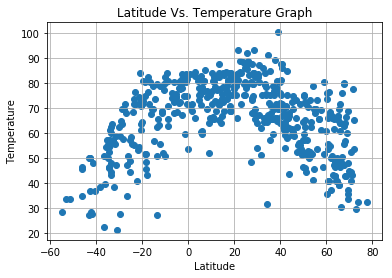

In [59]:
fig1, ax1 = plt.subplots()
ax1.scatter(data['latitude'], data['temperature'])
ax1.grid(True)

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude Vs. Temperature Graph')
plt.show()
fig1.savefig('LatVsTemp.png')

# Latitude Vs. Humidity

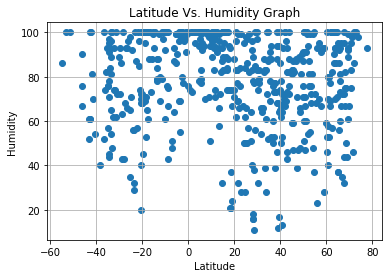

In [60]:
fig2, ax2 = plt.subplots()
ax2.scatter(data['latitude'], data['humility %'])
ax2.grid(True)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity Graph')
plt.show()
fig2.savefig('LatVsHum.png')

# Latitude Vs. Cloudiness

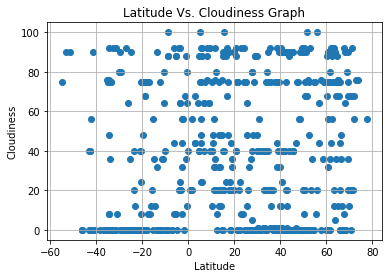

In [61]:
fig3, ax3 = plt.subplots()
ax3.scatter(data['latitude'], data['cloudiness %'])
ax3.grid(True)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness Graph')
plt.show()
fig3.savefig('LatVsCloud.png')

# Latitude Vs. Wind Speed

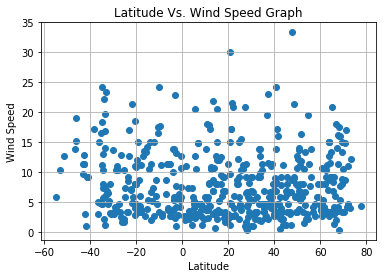

In [62]:
fig4, ax4 = plt.subplots()
ax4.scatter(data['latitude'], data['wind speed'])
ax4.grid(True)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs. Wind Speed Graph')
plt.show()
fig4.savefig('LatVsSpeed.png')

# Output

In [53]:
data.to_csv('data.csv')

# Observations

1. Temperature is highest around 30 degrees latitude and deceases as latitude approaches 90 degrees or -90 degrees.
2. Humidity is lowest where temperature is hottest ie. 30 degree latitude and decreases as lat approaches 90 or -90 degrees.
3. No observable trends for wind speed and cloudiness.